In [26]:
import pandas as pd
from pathlib import Path


download_path = Path.cwd()/'test'

metadata_file = Path.cwd()/'others'/'train.csv'
df = pd.read_csv(metadata_file)
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.head()

,id,expected
0,image_0.jpg,0 5
1,image_1.jpg,0 5
2,image_2.jpg,0 5
3,image_3.jpg,0 5
4,image_4.jpg,0 5


In [27]:
df['class'] = df.expected.apply(lambda x: x.split(' ')).apply(pd.Series)[0]
df['animal'] = df.expected.apply(lambda x: x.split(' ')).apply(pd.Series)[1]
df.head()

,id,expected,class,animal
0,image_0.jpg,0 5,0,5
1,image_1.jpg,0 5,0,5
2,image_2.jpg,0 5,0,5
3,image_3.jpg,0 5,0,5
4,image_4.jpg,0 5,0,5


In [21]:
df.columns


Index(['id', 'expected', 'group', 'animal'], dtype='object')

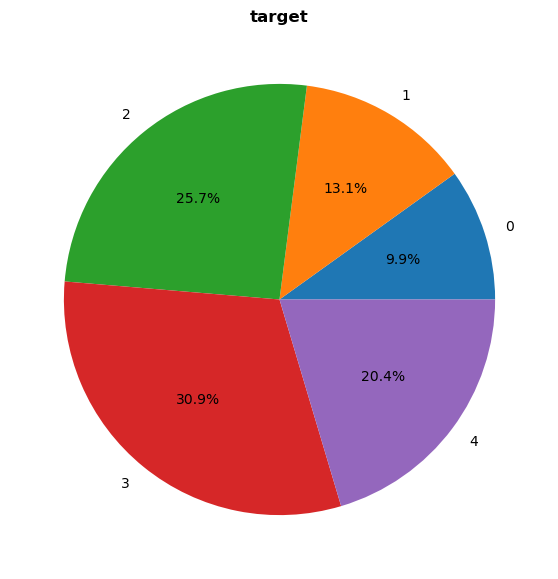

In [28]:
import matplotlib.pyplot as plt

many = list(df.groupby("class").count()["animal"])
labels = df.groupby("class").count().index.tolist()
plt.figure(figsize = (7, 7))
plt.pie(many, labels = labels, autopct='%0.0001f%%')
plt.title("target", fontweight="bold")
plt.show()

['5', '6', '7']


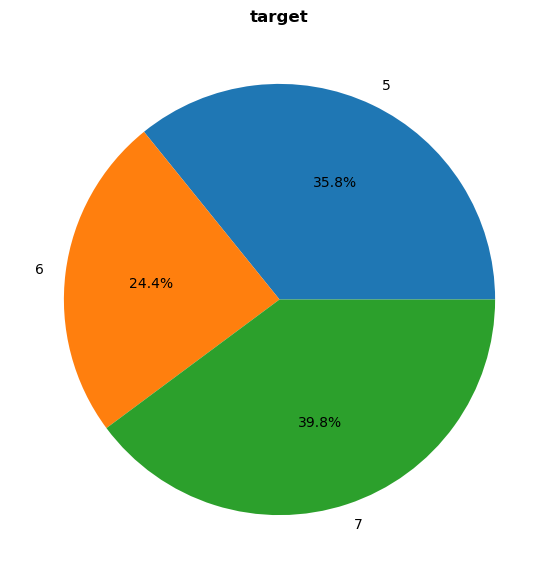

['10', '11', '12', '8', '9']


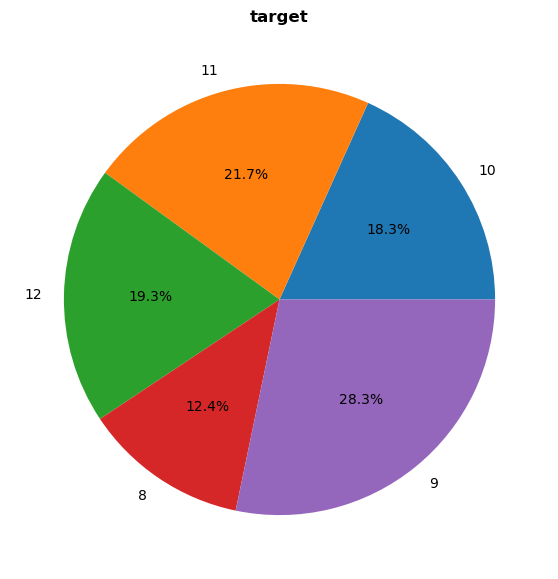

['13', '14', '15', '16', '17', '18', '19', '20']


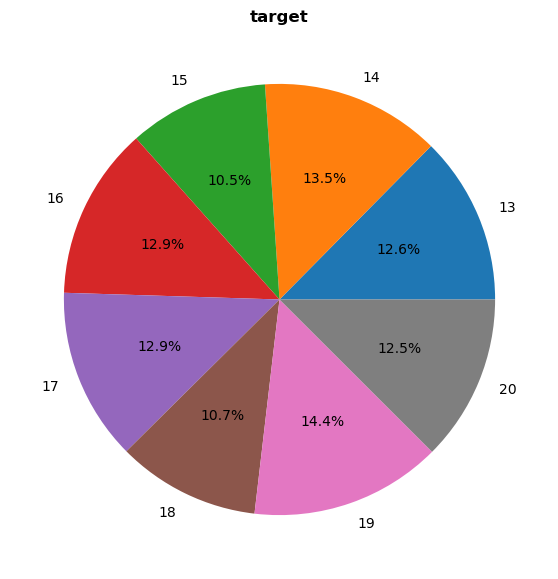

['21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


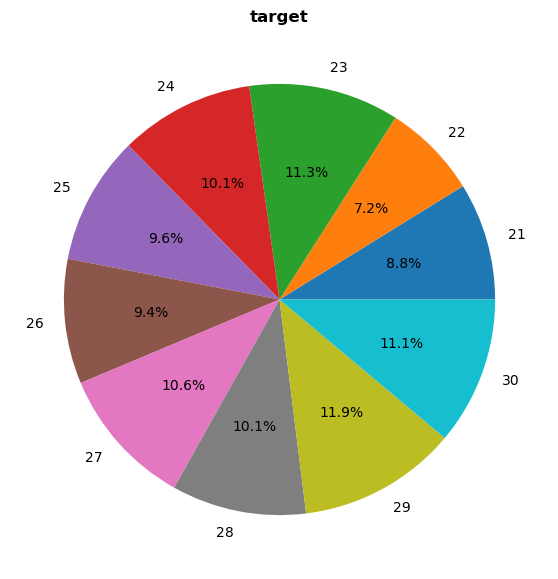

['31', '32', '33', '34', '35', '36']


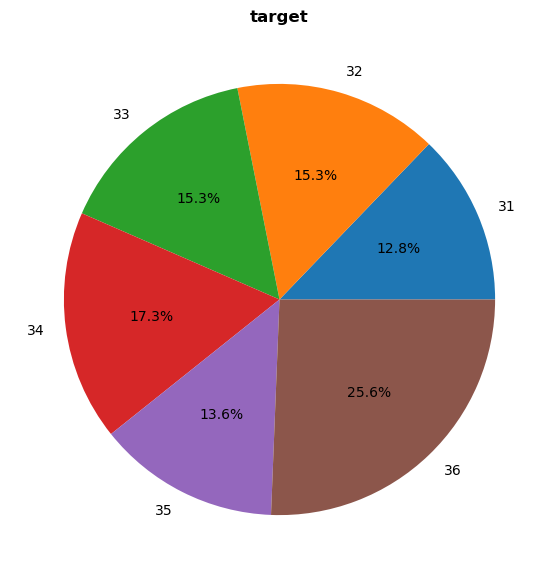

In [35]:
for name, group in df.groupby("class"):
    many = list(group.groupby("animal").count()["class"])
    labels = group.groupby("animal").count().index.tolist()
    print(labels) 
    plt.figure(figsize = (7, 7))
    plt.pie(many, labels = labels, autopct='%0.0001f%%')
    plt.title("target", fontweight="bold")
    plt.show()

In [36]:
df['relative_path'] =  '\\Train\\' + df['id'].astype(str)
df.head()

,id,expected,class,animal,relative_path
0,image_0.jpg,0 5,0,5,\Train\image_0.jpg
1,image_1.jpg,0 5,0,5,\Train\image_1.jpg
2,image_2.jpg,0 5,0,5,\Train\image_2.jpg
3,image_3.jpg,0 5,0,5,\Train\image_3.jpg
4,image_4.jpg,0 5,0,5,\Train\image_4.jpg


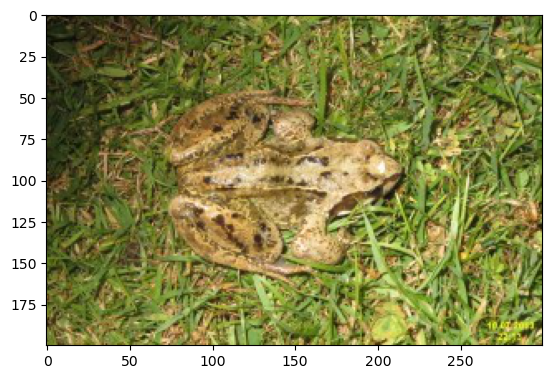

In [39]:
import matplotlib.image as mpimg
img = mpimg.imread('.\\'+df.relative_path[0])
imgplot = plt.imshow(img)
plt.show()

In [45]:
df.relative_path

0          \Train\image_0.jpg
1          \Train\image_1.jpg
2          \Train\image_2.jpg
3          \Train\image_3.jpg
4          \Train\image_4.jpg
                ...          
3517    \Train\image_4687.jpg
3518    \Train\image_4688.jpg
3519    \Train\image_4689.jpg
3520    \Train\image_4690.jpg
3521    \Train\image_4691.jpg
Name: relative_path, Length: 3522, dtype: object

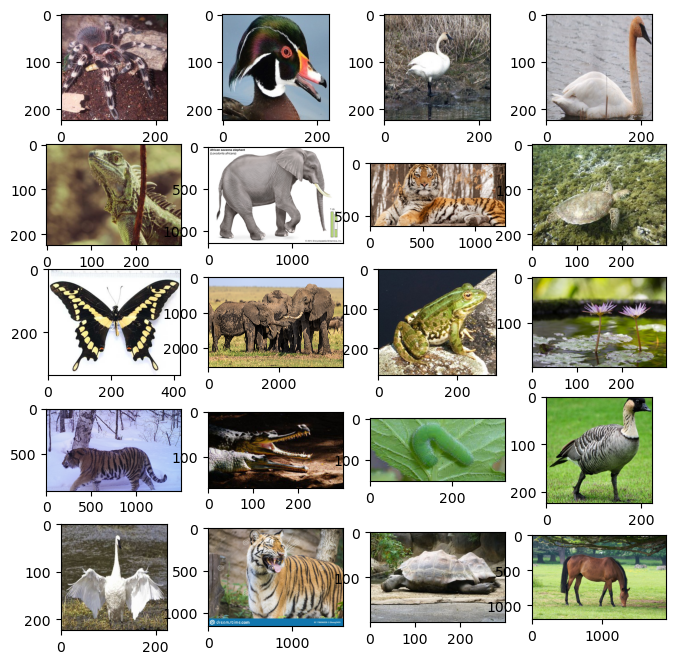

In [50]:
import random
from tkinter import image_names



fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

images = df.relative_path.sample(columns*rows)
i=0
for image in images:
    img = mpimg.imread('.\\'+image)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    i+=1
plt.show()